In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from pyfaidx import Fasta
from meth5 import MetH5File

from benchmark_pycometh.simulation.nanopolish_simulator import Simulator
from nanoepitools.plotting.general_plotting import PlotArchiver, plot_2d_density
from nanoepitools.plotting.plot_methylation_profile import plot_met_profile, plot_met_profile_from_matrix
from benchmark_pycometh.config import module_config

In [2]:
omics_simla_dir = Path("/home/r933r/data/projects/nanopore/pycometh_benchmark/simulated/wgbs/merged/")
omics_simla_profile_path = Path("/home/r933r/data/software/users/snajder/OmicsSIMLA_v0.6/profiles/methylation/WGBS/liver_profile.txt")
omics_simla_profile_map_path = Path("/home/r933r/data/software/users/snajder/OmicsSIMLA_v0.6/profiles/methylation/WGBS/map.txt")

sim = Simulator(omics_simla_dir, omics_simla_profile_path, omics_simla_profile_map_path)

In [3]:
import importlib
import benchmark_pycometh.simulation.nanopolish_simulator
importlib.reload(benchmark_pycometh.simulation.nanopolish_simulator)
sim.__class__ = benchmark_pycometh.simulation.nanopolish_simulator.Simulator

sim_m5_file = "/home/r933r/data/projects/nanopore/pycometh_benchmark/simulated/diffmet_merged_small.m5"
sim.generate_meth5(sim_m5_file, "sample", 500000, chunksize = 1000, n_procs=16)

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 888447/1000000 [10:44<01:20, 1378.16it/s]


{1, 2}


In [4]:
sim_m5_file = "/home/r933r/data/projects/nanopore/pycometh_benchmark/simulated/diffmet_merged_small.m5"
mf = MetH5File(sim_m5_file, "r")
mf_real = MetH5File(module_config.meth5_template_file.format(sample="HG002"), "r")

rates, sites = mf["1"].get_all_values().get_llr_site_rate()
cov, cov_sites = mf["1"].get_all_values().get_llr_site_aggregate(len)

In [5]:
pa = PlotArchiver("simulation", headless=False, config={"plot_archive_dir": "/home/r933r/snajder/nanoepitools_plots/benchmark"})

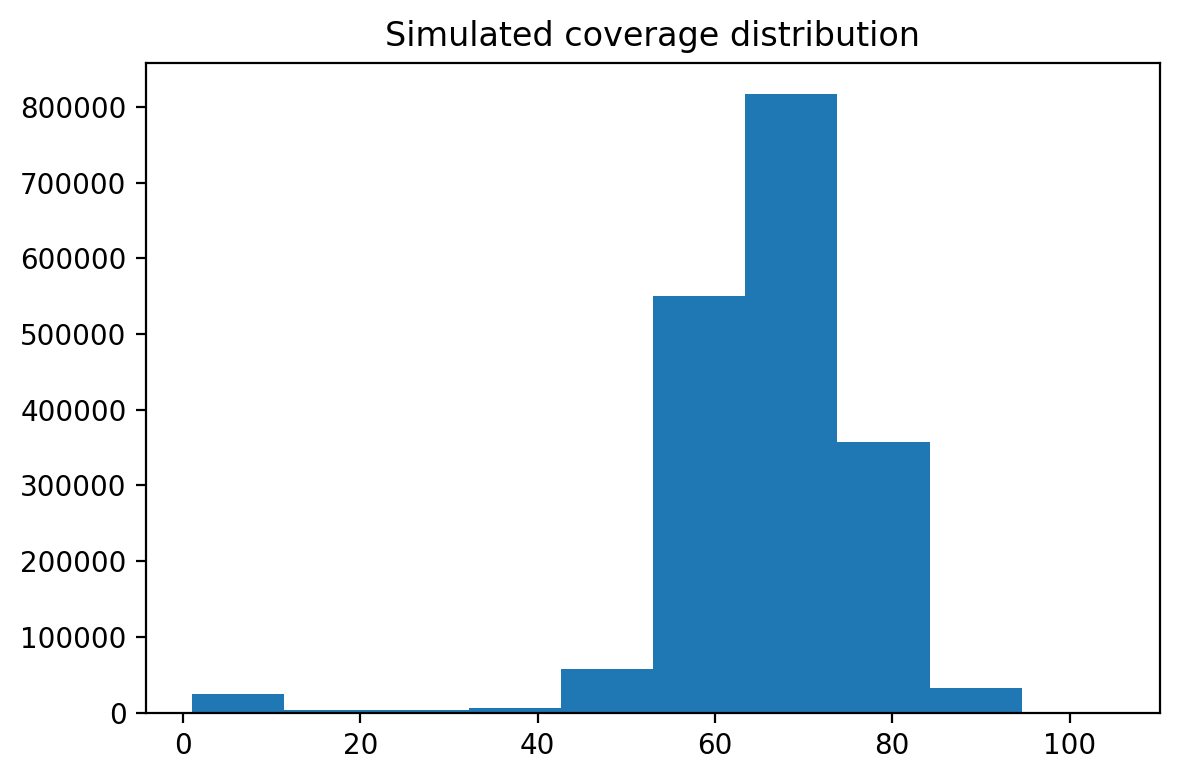

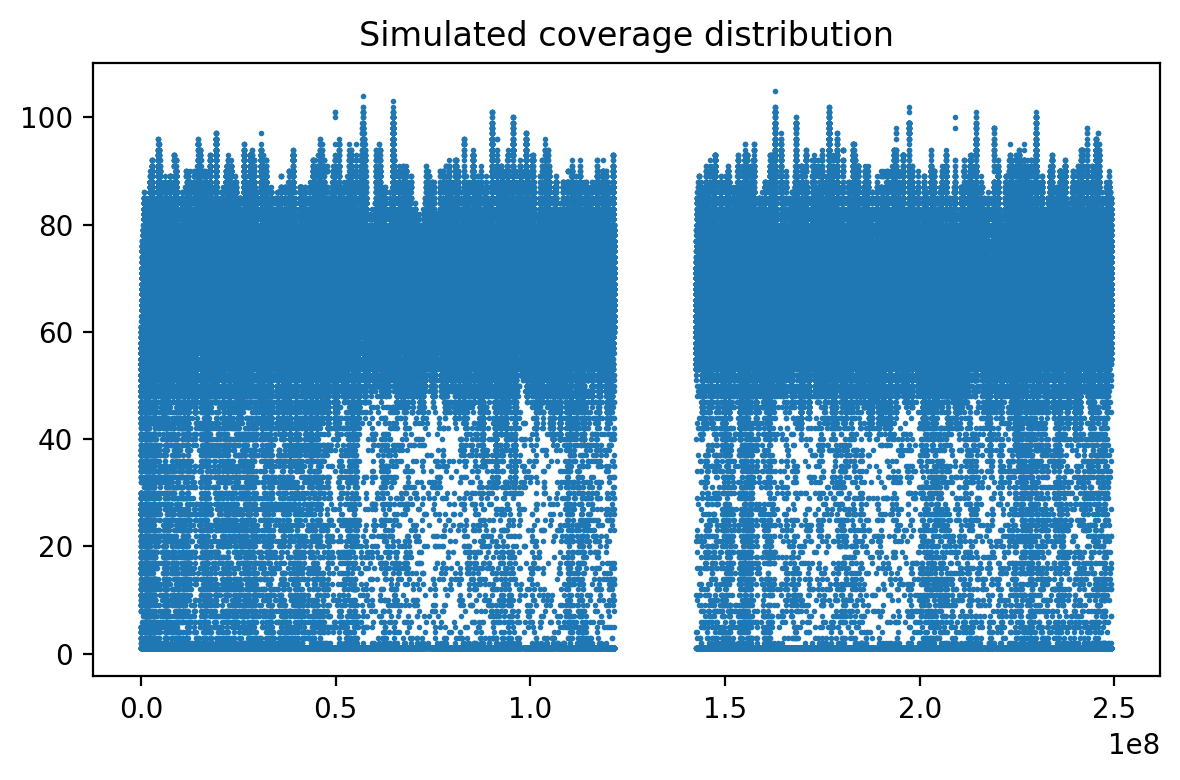

In [6]:
pa.figure()
plt.title("Simulated coverage distribution")
plt.hist(cov)
plt.show()

pa.figure()
plt.title("Simulated coverage distribution")
plt.scatter(cov_sites[:, 0], cov, s=1)
plt.show()

In [7]:
def plot_position(pos, to=None, flanks=5000):
    if to is None:
        to = pos + flanks
        pos = pos - flanks

    sample_colors ={1: "r", 2: "g"}
    pa.figure()
    matrix = mf["1"].get_values_in_range(pos, to).to_sparse_methylation_matrix(read_groups_key="sample")
    plot_met_profile_from_matrix(matrix, sample_colors=sample_colors)
    xlim = plt.xlim()
    plt.show()

    pa.figure()
    matrix_real = mf_real["1"].get_values_in_range(pos, to).to_sparse_methylation_matrix()
    plot_met_profile_from_matrix(matrix_real)
    plt.xlim(xlim[0], xlim[1])
    plt.show()

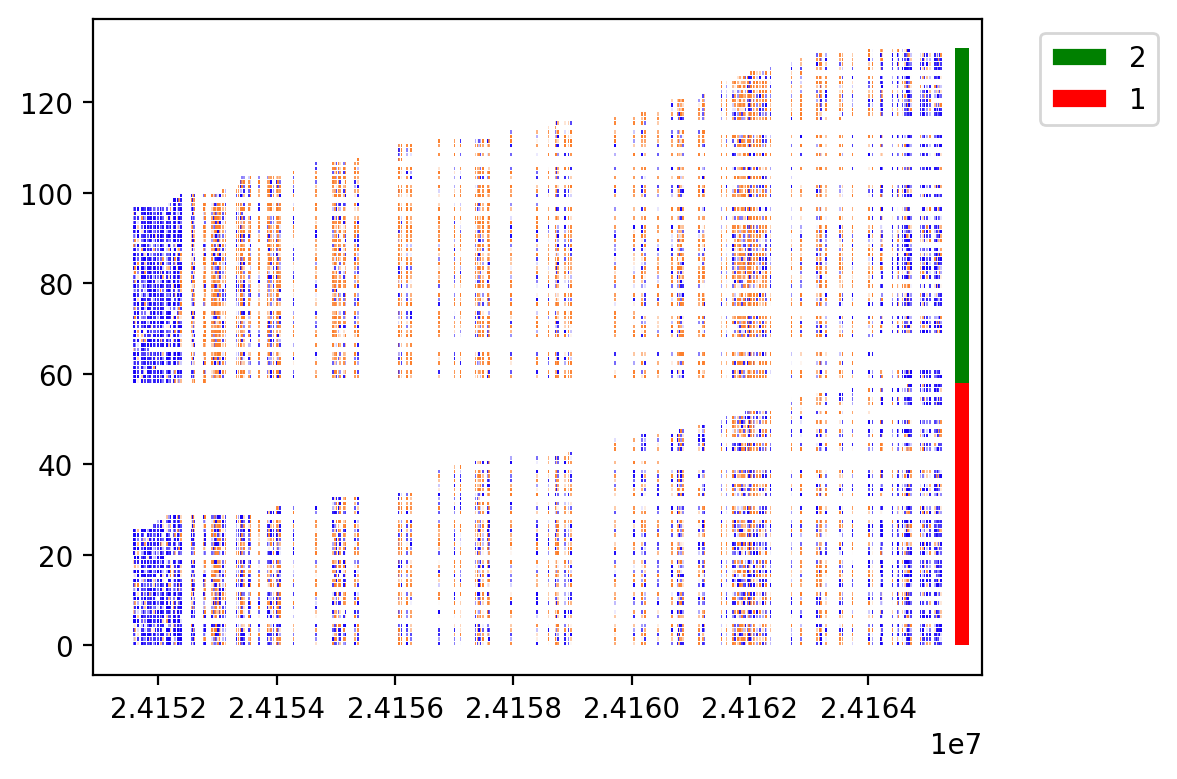

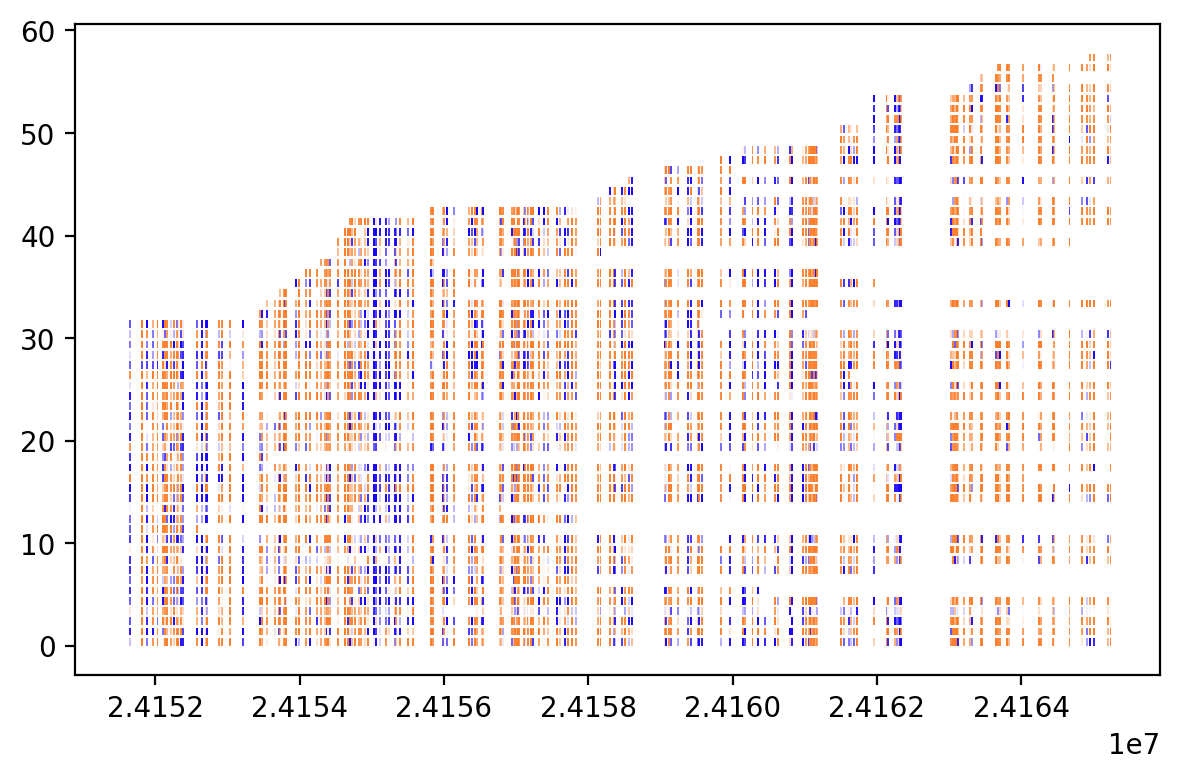

In [8]:
plot_position(24152578-1000, to=24164236+1000)
